# Bike Rental Demand Prediction Project

## Introduction
This project aims to analyze bike rental demand based on various factors such as weather conditions, time of day, season, and month. The dataset consists of hourly bike rental data, which will be used to explore trends and relationships influencing bike rentals.

## Dataset Description
The dataset contains the following columns:
- **instant**: Record index
- **dteday**: Date
- **season**: Season (1: winter, 2: spring, 3: summer, 4: fall)
- **yr**: Year (0: 2011, 1: 2012)
- **mnth**: Month (1 to 12)
- **hr**: Hour (0 to 23)
- **holiday**: Whether the day is a holiday (0: no, 1: yes)
- **weekday**: Day of the week (0: Sunday, 1: Monday, ..., 6: Saturday)
- **workingday**: Whether the day is a working day (0: no, 1: yes)
- **weathersit**: Weather situation (1: Clear, 2: Mist + Cloudy, 3: Light Snow + Rain, 4: Heavy Rain + Ice Pallets)
- **temp**: Normalized temperature in Celsius
- **atemp**: Normalized feeling temperature in Celsius
- **hum**: Normalized humidity
- **windspeed**: Normalized wind speed
- **casual**: Count of casual users
- **registered**: Count of registered users
- **cnt**: Total bike rentals (target variable)



# Step 1: Data Loading
## Load the necessary libraries and the dataset for analysis.

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [228]:
# Load the first dataset
day_dataset = pd.read_csv('day.csv')

# Load the second dataset
hour_dataset = pd.read_csv('hour.csv')

# Step 2: Data Exploration

In [229]:
# Display the first few rows of the dataset
dazy_dataset.head(10)
day_dataset.count()

instant       731
dteday        731
season        731
yr            731
mnth          731
holiday       731
weekday       731
workingday    731
weathersit    731
temp          731
atemp         731
hum           731
windspeed     731
casual        731
registered    731
cnt           731
dtype: int64

In [230]:
hour_dataset.count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [232]:
hour_dataset.head(10)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


# Step 3: Data Preprocessing

In [233]:
day_dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [234]:
hour_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [235]:
#Check the datatype of columns 
day_dataset.info()
hour_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [237]:
# Fetching the Column Names
hour_dataset.columns
day_dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [238]:
# Check for missing values
hour_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [239]:
day_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [240]:
# Merging two columns together.
day_dataset['dteday'] = pd.to_datetime(day_dataset['dteday'])
hour_dataset['dteday'] = pd.to_datetime(hour_dataset['dteday'])

In [241]:
# Merge the datasets on 'dteday'
merged_dataset = pd.merge(day_dataset, hour_dataset, on='dteday', how='inner')

In [242]:
merged_dataset.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [243]:
#drop the non-required columns.
merged_dataset.drop(columns=['instant_x', 'dteday'], inplace=True)


In [244]:
merged_dataset.head()

,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [245]:
merged_dataset.columns

Index(['season_x', 'yr_x', 'mnth_x', 'holiday_x', 'weekday_x', 'workingday_x',
       'weathersit_x', 'temp_x', 'atemp_x', 'hum_x', 'windspeed_x', 'casual_x',
       'registered_x', 'cnt_x', 'instant_y', 'season_y', 'yr_y', 'mnth_y',
       'hr', 'holiday_y', 'weekday_y', 'workingday_y', 'weathersit_y',
       'temp_y', 'atemp_y', 'hum_y', 'windspeed_y', 'casual_y', 'registered_y',
       'cnt_y'],
      dtype='object')

In [246]:
merged_dataset.corr()

,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
season_x,1.000000,-0.010742,0.830386,-0.009585,-0.002335,0.013743,0.014940,0.329317,0.337911,0.204967,...,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr_x,-0.010742,1.000000,-0.010473,0.006692,-0.004485,-0.002196,-0.051939,0.043181,0.041497,-0.113688,...,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth_x,0.830386,-0.010473,1.000000,0.018430,0.010400,-0.003477,0.041683,0.212869,0.220170,0.223727,...,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
holiday_x,-0.009585,0.006692,0.018430,1.000000,-0.102088,-0.252471,-0.033653,-0.028856,-0.032770,-0.014408,...,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday_x,-0.002335,-0.004485,0.010400,-0.102088,1.000000,0.035955,0.035082,-0.001894,-0.009333,-0.050564,...,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday_x,0.013743,-0.002196,-0.003477,-0.252471,0.035955,1.000000,0.057122,0.058460,0.057839,0.021347,...,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit_x,0.014940,-0.051939,0.041683,-0.033653,0.035082,0.057122,1.000000,-0.119714,-0.120853,0.589186,...,0.035082,0.057122,0.601478,-0.113428,-0.114225,0.432977,0.017788,-0.140963,-0.106774,-0.127413
temp_x,0.329317,0.043181,0.212869,-0.028856,-0.001894,0.058460,-0.119714,1.000000,0.991608,0.131257,...,-0.001894,0.058460,-0.098238,0.947491,0.937229,0.096457,-0.101965,0.312517,0.225692,0.273276
atemp_x,0.337911,0.041497,0.220170,-0.032770,-0.009333,0.057839,-0.120853,0.991608,1.000000,0.144272,...,-0.009333,0.057839,-0.100109,0.939540,0.945161,0.106022,-0.118299,0.312873,0.227536,0.274911
hum_x,0.204967,-0.113688,0.223727,-0.014408,-0.050564,0.021347,0.589186,0.131257,0.144272,1.000000,...,-0.050564,0.021347,0.426635,0.124365,0.136360,0.734874,-0.162909,-0.041860,-0.034857,-0.040465


In [247]:
# Dropping the hour dataset columns as they are duplicates
columns_to_drop = ['instant_y', 'season_y', 'yr_y', 'mnth_y', 
                   'holiday_y', 'weekday_y', 'workingday_y', 
                   'casual_y', 'registered_y', 'cnt_y']
merged_dataset.drop(columns=columns_to_drop, inplace=True)


In [248]:
merged_dataset.head()

,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0.22,0.2727,0.80,0.0
2,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0.22,0.2727,0.80,0.0
3,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0.24,0.2879,0.75,0.0
4,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0.24,0.2879,0.75,0.0


In [249]:
# Optionally, rename the columns to remove the '_x' suffix for clarity
merged_dataset.columns = merged_dataset.columns.str.replace('_x', '')

# Check the resulting DataFrame
merged_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0.22,0.2727,0.80,0.0
2,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0.22,0.2727,0.80,0.0
3,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0.24,0.2879,0.75,0.0
4,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0.24,0.2879,0.75,0.0


In [250]:
merged_dataset.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y
season,1.000000,-0.010742,0.830386,-0.009585,-0.002335,0.013743,0.014940,0.329317,0.337911,0.204967,-0.237335,0.208511,0.413905,0.408077,-0.006117,-0.014524,0.312025,0.319380,0.150625,-0.149773
yr,-0.010742,1.000000,-0.010473,0.006692,-0.004485,-0.002196,-0.051939,0.043181,0.041497,-0.113688,-0.013849,0.247960,0.599744,0.571927,-0.003867,-0.019157,0.040913,0.039222,-0.083546,-0.008740
mnth,0.830386,-0.010473,1.000000,0.018430,0.010400,-0.003477,0.041683,0.212869,0.220170,0.223727,-0.214538,0.118886,0.291882,0.277704,-0.005772,0.005400,0.201691,0.208096,0.164411,-0.135386
holiday,-0.009585,0.006692,0.018430,1.000000,-0.102088,-0.252471,-0.033653,-0.028856,-0.032770,-0.014408,0.006319,0.054134,-0.111327,-0.070344,0.000479,-0.017036,-0.027340,-0.030973,-0.010588,0.003988
weekday,-0.002335,-0.004485,0.010400,-0.102088,1.000000,0.035955,0.035082,-0.001894,-0.009333,-0.050564,0.018226,0.058700,0.053629,0.064204,-0.003498,0.003311,-0.001795,-0.008821,-0.037158,0.011502
workingday,0.013743,-0.002196,-0.003477,-0.252471,0.035955,1.000000,0.057122,0.058460,0.057839,0.021347,-0.018746,-0.517844,0.314491,0.068216,0.002285,0.044672,0.055390,0.054667,0.015688,-0.011830
weathersit,0.014940,-0.051939,0.041683,-0.033653,0.035082,0.057122,1.000000,-0.119714,-0.120853,0.589186,0.028187,-0.242757,-0.251731,-0.289650,-0.000535,0.601478,-0.113428,-0.114225,0.432977,0.017788
temp,0.329317,0.043181,0.212869,-0.028856,-0.001894,0.058460,-0.119714,1.000000,0.991608,0.131257,-0.161577,0.539726,0.536407,0.625232,-0.007823,-0.098238,0.947491,0.937229,0.096457,-0.101965
atemp,0.337911,0.041497,0.220170,-0.032770,-0.009333,0.057839,-0.120853,0.991608,1.000000,0.144272,-0.187460,0.540420,0.540841,0.629054,-0.007840,-0.100109,0.939540,0.945161,0.106022,-0.118299
hum,0.204967,-0.113688,0.223727,-0.014408,-0.050564,0.021347,0.589186,0.131257,0.144272,1.000000,-0.258150,-0.071614,-0.081968,-0.091657,-0.001111,0.426635,0.124365,0.136360,0.734874,-0.162909


# Step 4: Univariate Analysis

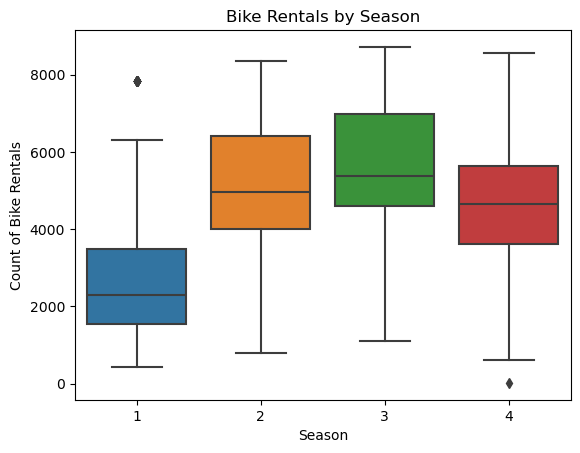

In [251]:
# Plotting distributions for relevant columns
sns.boxplot(x='season', y='cnt', data=merged_dataset)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Count of Bike Rentals')
plt.show()


season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

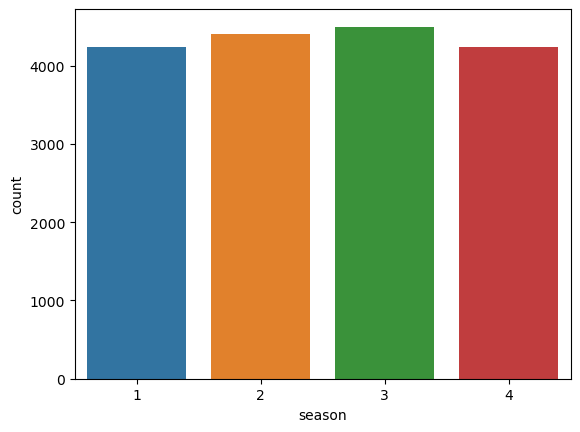

In [252]:
sns.countplot(merged_dataset, x="season")

merged_dataset['season'].value_counts()

yr
1    8734
0    8645
Name: count, dtype: int64

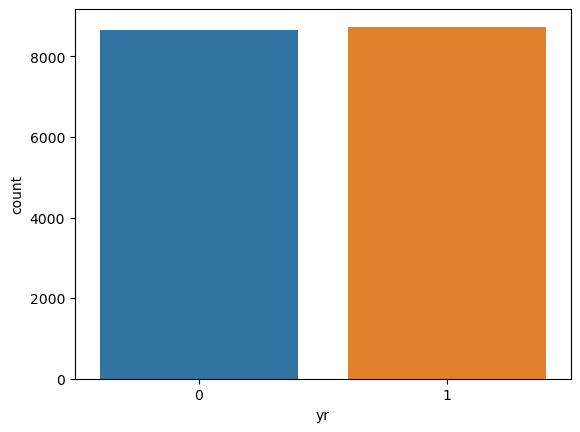

In [253]:
sns.countplot(merged_dataset, x="yr")

merged_dataset['yr'].value_counts()

mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64

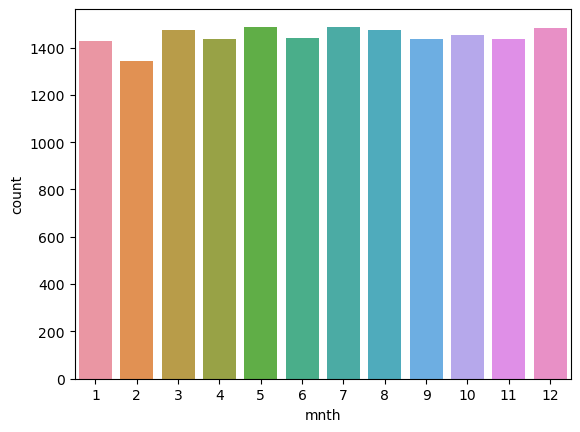

In [254]:
sns.countplot(merged_dataset, x="mnth")

merged_dataset['mnth'].value_counts()

holiday
0    16879
1      500
Name: count, dtype: int64

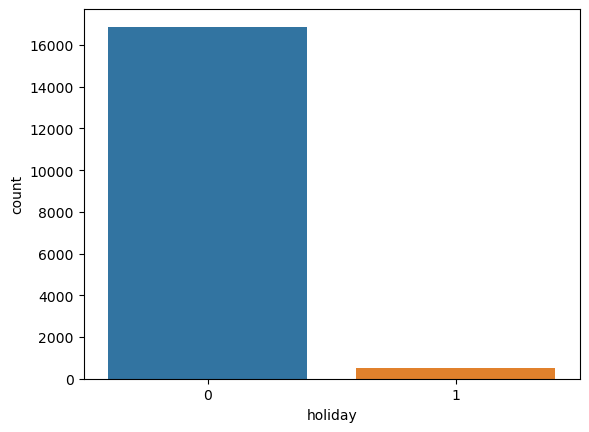

In [255]:
sns.countplot(merged_dataset, x="holiday")

merged_dataset['holiday'].value_counts()
#holiday 	weekday 	workingday 	weathersit 	temp 	atemp 	hum 	windspeed 	casual 	registered

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

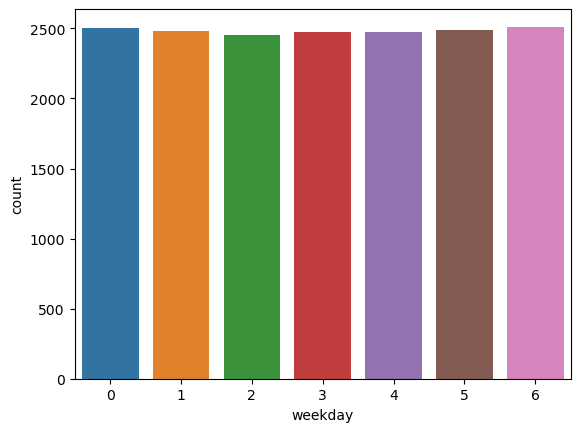

In [256]:
sns.countplot(merged_dataset, x="weekday")

merged_dataset['weekday'].value_counts()

workingday
1    11865
0     5514
Name: count, dtype: int64

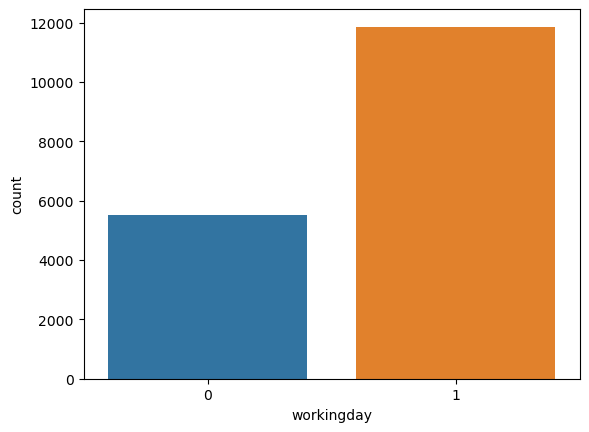

In [257]:
sns.countplot(merged_dataset, x="workingday")

merged_dataset['workingday'].value_counts()

weathersit
1    11040
2     5871
3      468
Name: count, dtype: int64

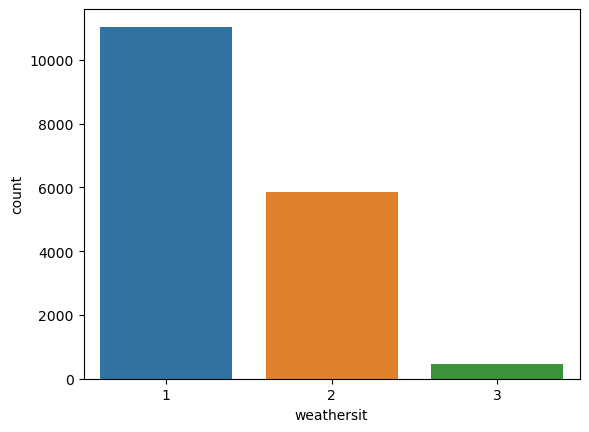

In [258]:
sns.countplot(merged_dataset, x="weathersit")

merged_dataset['weathersit'].value_counts()

temp
0.635000    120
0.265833    120
0.564167     96
0.710833     96
0.649167     96
           ... 
0.707059     17
0.216667     12
0.318182     11
0.195000      8
0.440000      1
Name: count, Length: 499, dtype: int64

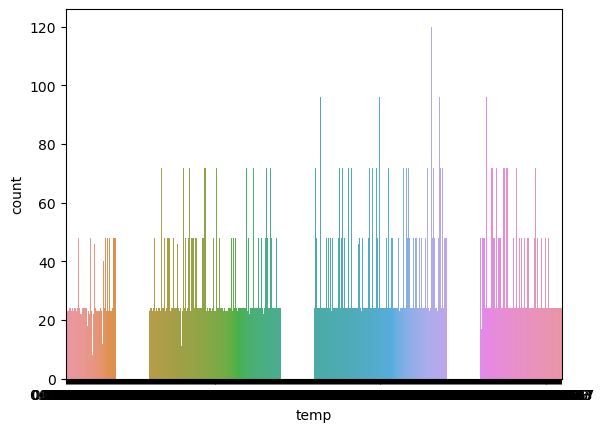

In [259]:
sns.countplot(merged_dataset, x="temp")

merged_dataset['temp'].value_counts()

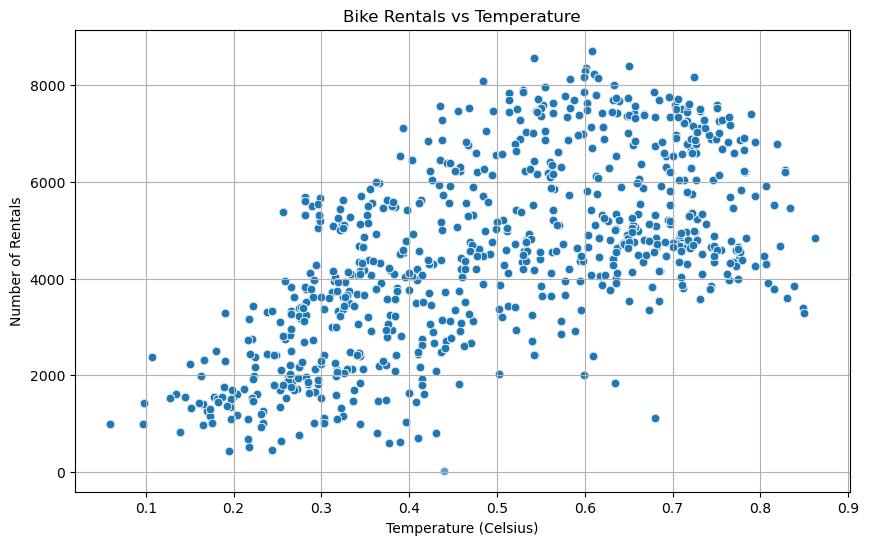

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `merged_dataset` is your DataFrame with temperature and counts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_dataset, x='temp', y='cnt', alpha=0.7)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Rentals')
plt.grid()
plt.show()


atemp
0.654688    96
0.637008    72
0.375621    72
0.325750    48
0.243058    48
            ..
0.203600    16
0.232333    12
0.309909    11
0.219700     8
0.439400     1
Name: count, Length: 690, dtype: int64

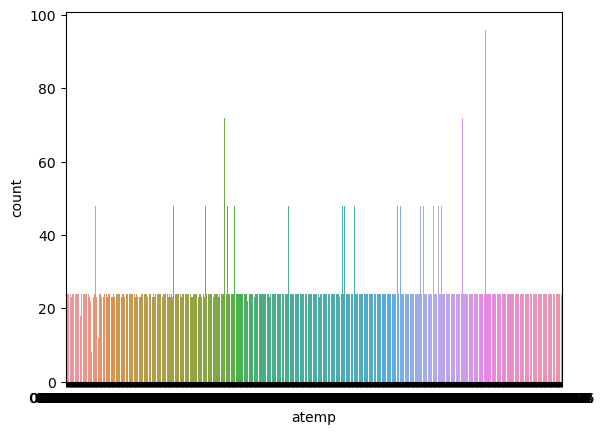

In [261]:
sns.countplot(merged_dataset, x="atemp")

merged_dataset['atemp'].value_counts()

 # Step 5: Bivariate Analysis

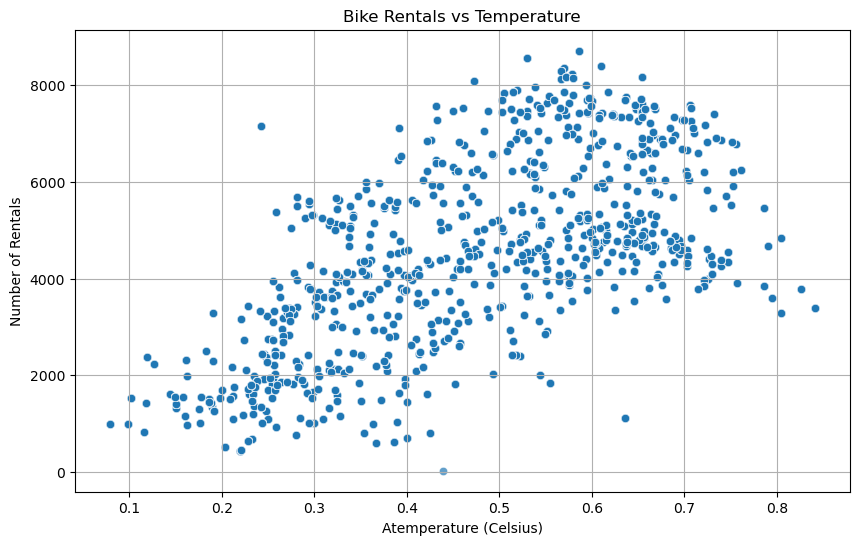

In [262]:
# Assuming `merged_dataset` is your DataFrame with temperature and counts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_dataset, x='atemp', y='cnt', alpha=0.7)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Atemperature (Celsius)')
plt.ylabel('Number of Rentals')
plt.grid()
plt.show()

hum
0.613333    96
0.630833    72
0.590417    72
0.690000    72
0.570000    72
            ..
0.561765    17
0.861667    12
0.825455    11
0.687500     8
0.880000     1
Name: count, Length: 595, dtype: int64

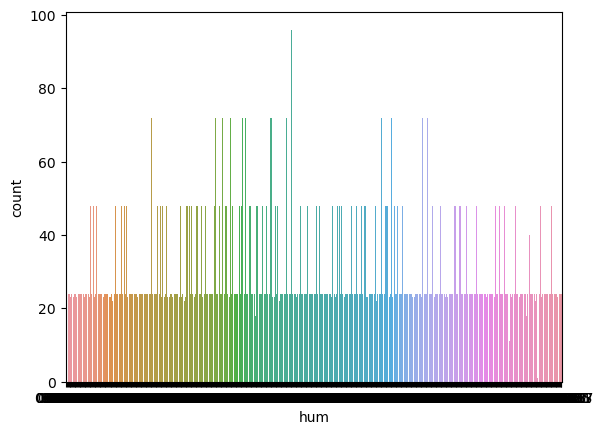

In [263]:
sns.countplot(merged_dataset, x="hum")

merged_dataset['hum'].value_counts()
#hum 	windspeed 	casual 	registered

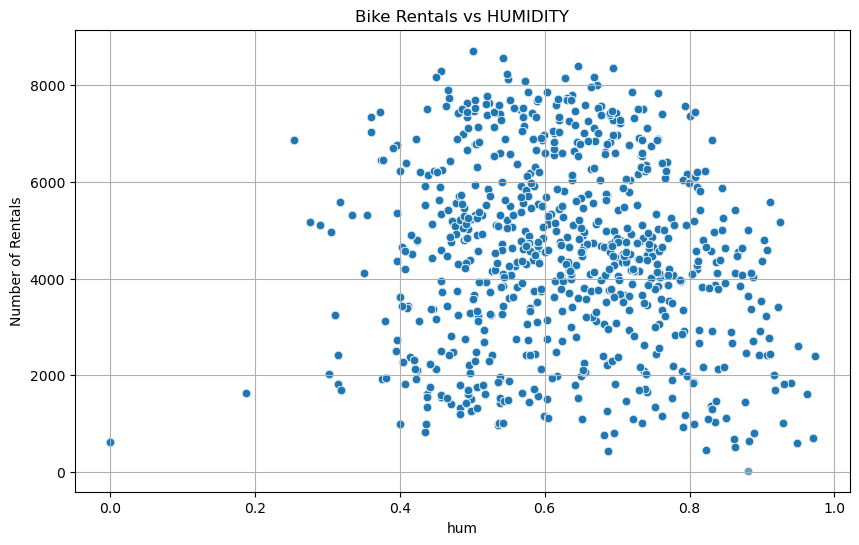

In [264]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_dataset, x='hum', y='cnt', alpha=0.7)
plt.title('Bike Rentals vs HUMIDITY')
plt.xlabel('hum')
plt.ylabel('Number of Rentals')
plt.grid()
plt.show()

windspeed
0.136817    72
0.118792    72
0.166667    72
0.149883    72
0.106350    72
            ..
0.304659    17
0.293850    16
0.213009    11
0.113837     8
0.358200     1
Name: count, Length: 650, dtype: int64

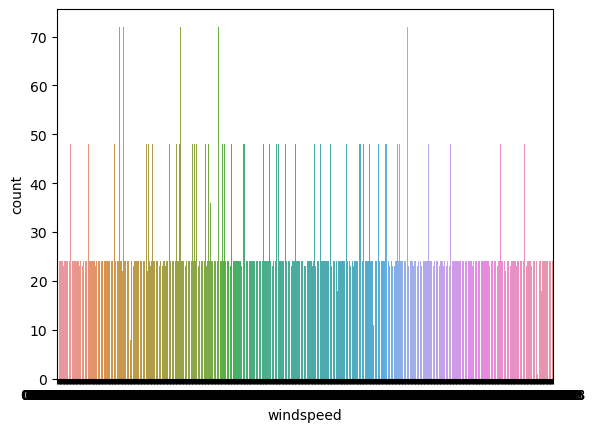

In [265]:
sns.countplot(merged_dataset, x="windspeed")

merged_dataset['windspeed'].value_counts()

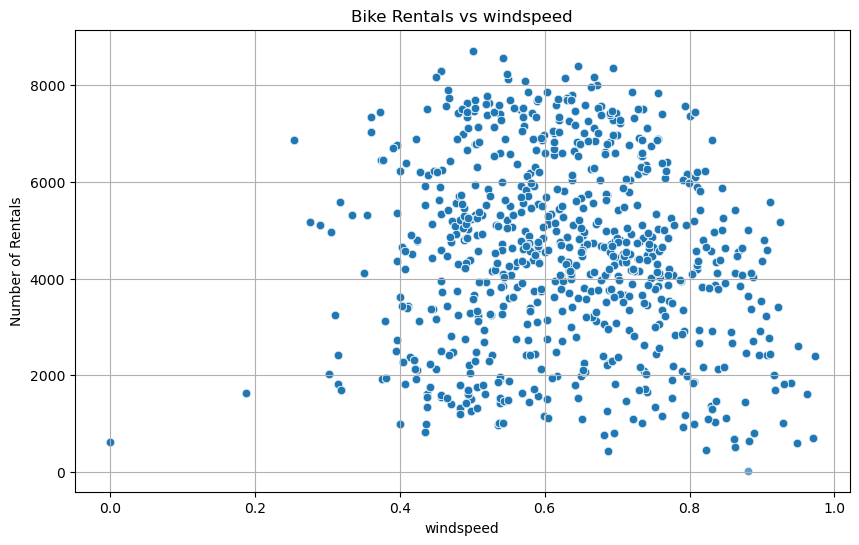

In [266]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_dataset, x='hum', y='cnt', alpha=0.7)
plt.title("Bike Rentals vs windspeed")
plt.xlabel("windspeed")
plt.ylabel('Number of Rentals')
plt.grid()
plt.show()

casual
968     96
120     93
653     72
775     72
163     71
        ..
1415    17
34      16
87      11
15       8
2        1
Name: count, Length: 606, dtype: int64

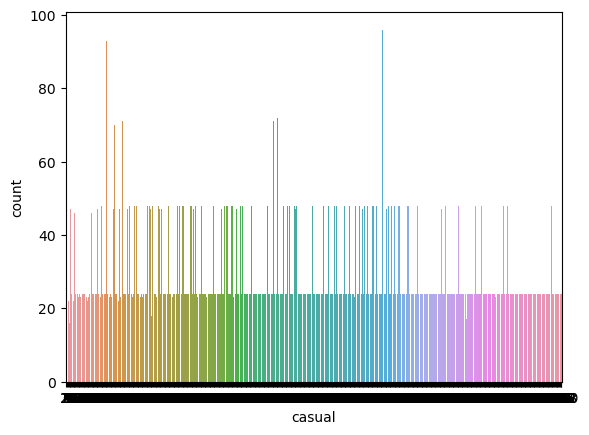

In [267]:
sns.countplot(merged_dataset, x="casual")

merged_dataset['casual'].value_counts()

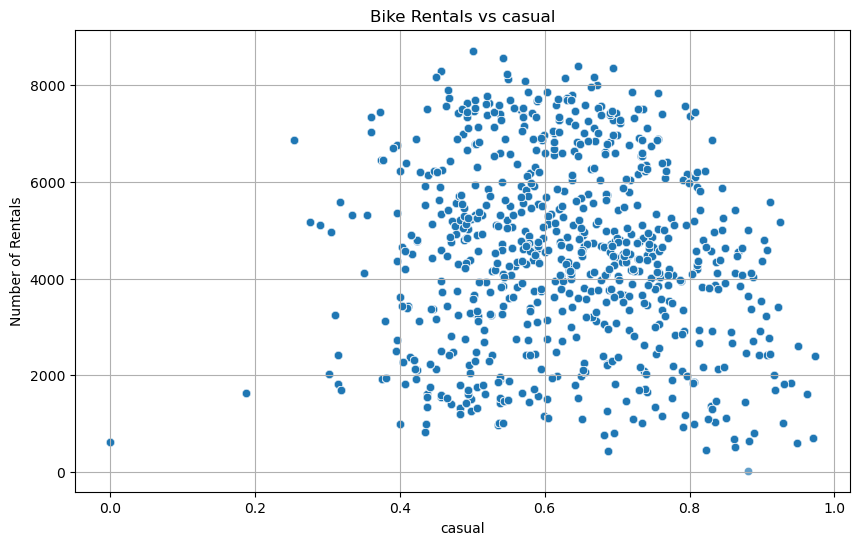

In [268]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_dataset, x='hum', y='cnt', alpha=0.7)
plt.title("Bike Rentals vs casual")
plt.xlabel("casual")
plt.ylabel('Number of Rentals')
plt.grid()
plt.show()

registered
4841    72
6248    72
1707    70
4446    48
2419    48
        ..
2919    17
472     16
1009    11
416      8
20       1
Name: count, Length: 679, dtype: int64

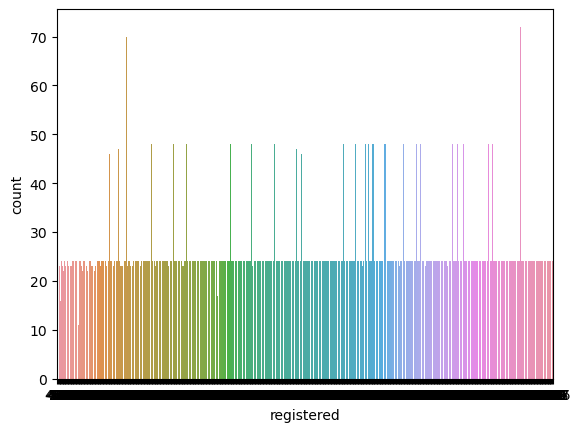

In [269]:
sns.countplot(merged_dataset, x="registered")

merged_dataset['registered'].value_counts()

In [270]:
#humidity has a very weak correlation with count,so  i am dropping humidity from my analysis,
#as it may not add significant value in predicting bike rentals.
merged_dataset.drop(columns=['hum'],inplace=True)

In [271]:
merged_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,cnt,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y
0,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,1,1,0.22,0.2727,0.80,0.0
2,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,2,1,0.22,0.2727,0.80,0.0
3,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,3,1,0.24,0.2879,0.75,0.0
4,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,4,1,0.24,0.2879,0.75,0.0


# Correlation matrix

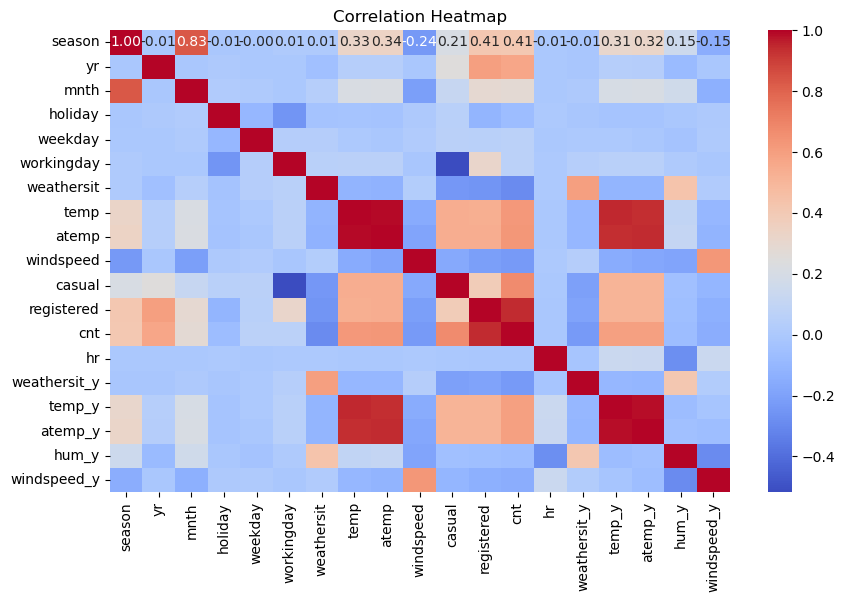

In [272]:
#Examine relationships between the target variable (cnt) and other features.
plt.figure(figsize=(10, 6))
sns.heatmap(merged_dataset.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


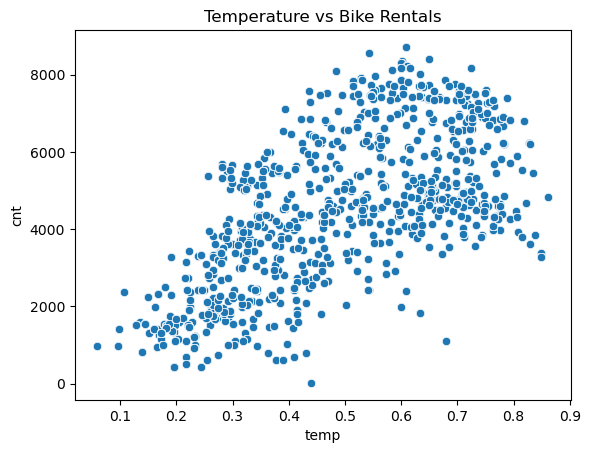

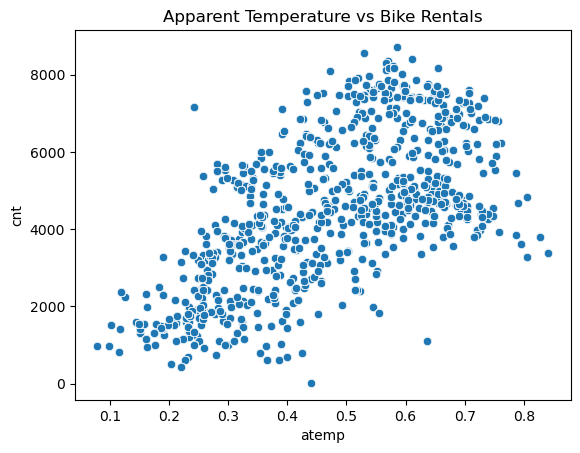

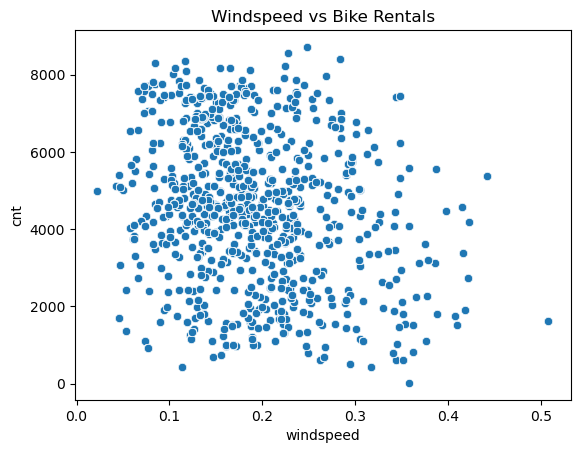

In [273]:
sns.scatterplot(data=merged_dataset, x='temp', y='cnt')
plt.title('Temperature vs Bike Rentals')
plt.show()

sns.scatterplot(data=merged_dataset, x='atemp', y='cnt')
plt.title('Apparent Temperature vs Bike Rentals')
plt.show()

sns.scatterplot(data=merged_dataset, x='windspeed', y='cnt')
plt.title('Windspeed vs Bike Rentals')
plt.show()


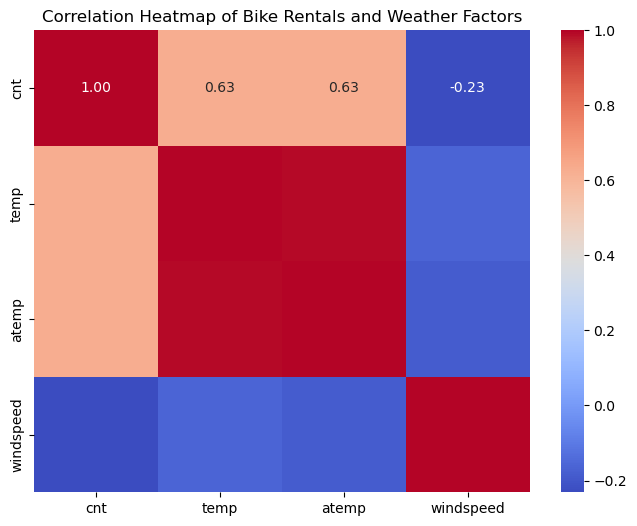

In [274]:
# Calculate the correlation matrix
correlation_matrix = merged_dataset[['cnt', 'temp', 'atemp', 'windspeed']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Bike Rentals and Weather Factors')
plt.show()


C:\Users\sandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


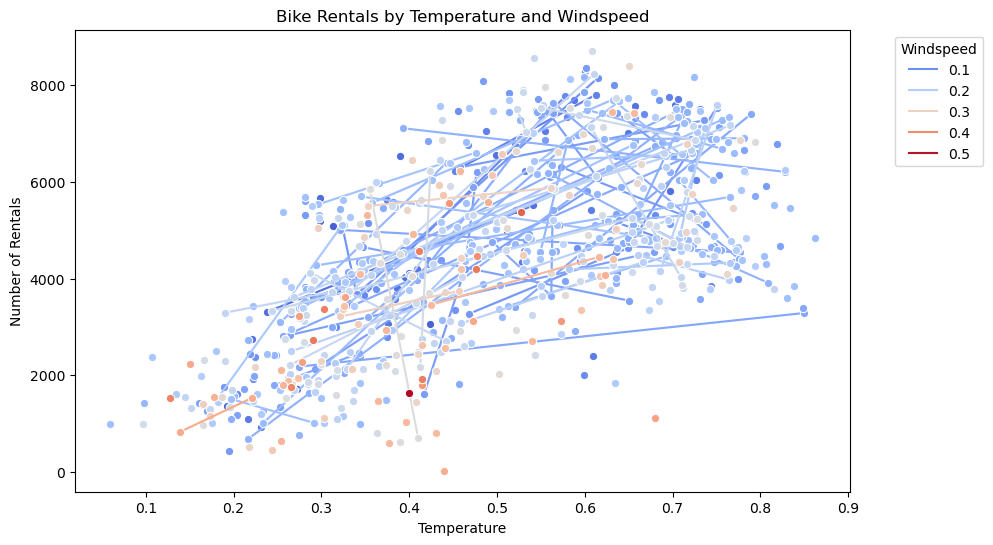

In [275]:
# Create an interaction plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_dataset, x='temp', y='cnt', hue='windspeed', palette='coolwarm', marker='o', dashes=False)
plt.title('Bike Rentals by Temperature and Windspeed')
plt.xlabel('Temperature')
plt.ylabel('Number of Rentals')
plt.legend(title='Windspeed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [276]:
# Create a new feature that represents the interaction between temp and windspeed
merged_dataset['temp_windspeed'] = merged_dataset['temp'] * merged_dataset['windspeed']

# Calculate the correlation
correlation = merged_dataset[['cnt', 'temp', 'windspeed', 'temp_windspeed']].corr()
print(correlation)

                     cnt      temp  windspeed  temp_windspeed
cnt             1.000000  0.625232  -0.231340        0.289292
temp            0.625232  1.000000  -0.161577        0.609042
windspeed      -0.231340 -0.161577   1.000000        0.637508
temp_windspeed  0.289292  0.609042   0.637508        1.000000


In [277]:
merged_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,cnt,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,temp_windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,0,1,0.24,0.2879,0.81,0.0,0.05522
1,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,1,1,0.22,0.2727,0.80,0.0,0.05522
2,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,2,1,0.22,0.2727,0.80,0.0,0.05522
3,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,3,1,0.24,0.2879,0.75,0.0,0.05522
4,1,0,1,0,6,0,2,0.344167,0.363625,0.160446,331,654,985,4,1,0.24,0.2879,0.75,0.0,0.05522


In [279]:
#Analysis on different columns of hour dataset...
#how they are showing their relation with dependable variable/target variable count.


In [288]:
remaining_columns = ['hr','weathersit_y', 'temp_y', 'atemp_y', 'hum_y', 'windspeed_y']
merged_dataset[remaining_columns].describe()

,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,1.425283,0.496987,0.475775,0.627229,0.190098
std,6.914405,0.639357,0.192556,0.171850,0.192930,0.122340
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500
50%,12.000000,1.000000,0.500000,0.484800,0.630000,0.194000
75%,18.000000,2.000000,0.660000,0.621200,0.780000,0.253700
max,23.000000,4.000000,1.000000,1.000000,1.000000,0.850700


In [289]:
correlation_matrix = merged_dataset[remaining_columns + ['cnt']].corr()
correlation_matrix

,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,cnt
hr,1.000000,-0.020203,0.137603,0.133750,-0.276498,0.137252,-0.008729
weathersit_y,-0.020203,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.230464
temp_y,0.137603,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.592402
atemp_y,0.133750,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.594557
hum_y,-0.276498,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.067356
windspeed_y,0.137252,0.026226,-0.023125,-0.062336,-0.290105,1.000000,-0.145990
cnt,-0.008729,-0.230464,0.592402,0.594557,-0.067356,-0.145990,1.000000


weathersit_y
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

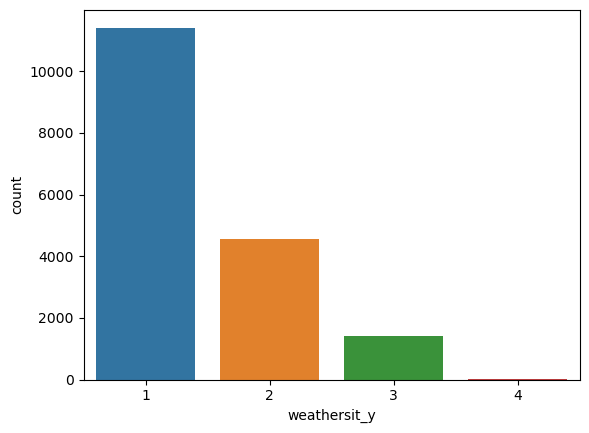

In [283]:
sns.countplot(merged_dataset, x="weathersit_y")

merged_dataset['weathersit_y'].value_counts()

temp_y
0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.46    559
0.26    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.14    138
0.84    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.08     17
0.02     17
0.04     16
0.06     16
0.96     16
0.98      1
1.00      1
Name: count, dtype: int64

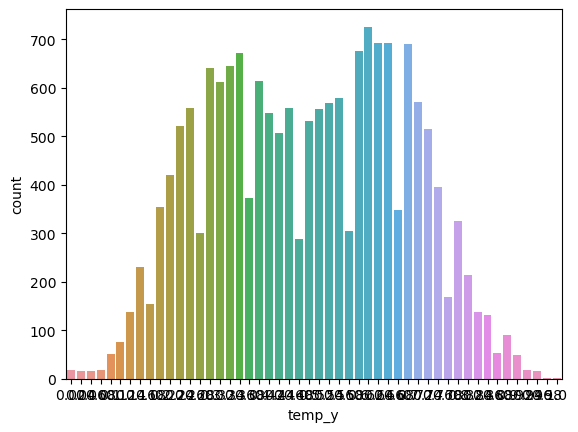

In [284]:
sns.countplot(merged_dataset, x="temp_y",)

merged_dataset['temp_y'].value_counts()
#temp_y 	atemp_y 	hum_y 	windspeed_y 	

hum_y
0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.12      1
0.08      1
0.10      1
0.97      1
0.91      1
Name: count, Length: 89, dtype: int64

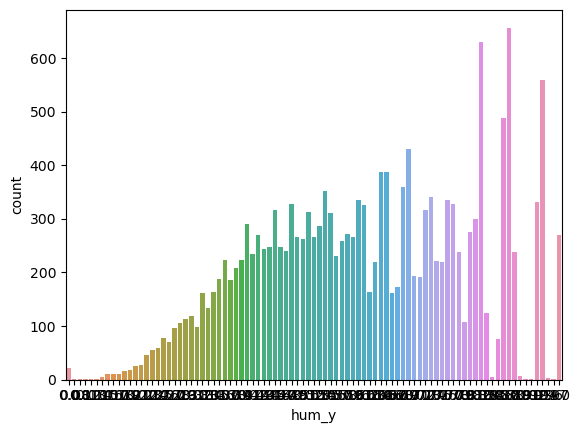

In [285]:
sns.countplot(merged_dataset, x="hum_y",)

merged_dataset['hum_y'].value_counts()

windspeed_y
0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.7463       2
0.8060       2
0.8507       2
0.7164       2
0.7761       1
0.8358       1
Name: count, dtype: int64

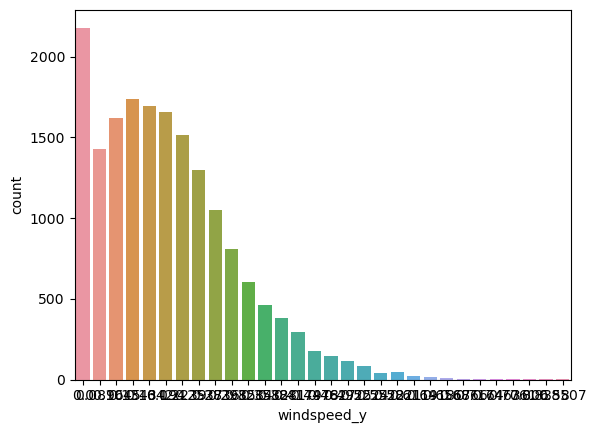

In [291]:
sns.countplot(merged_dataset, x="windspeed_y")

merged_dataset['windspeed_y'].value_counts()

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

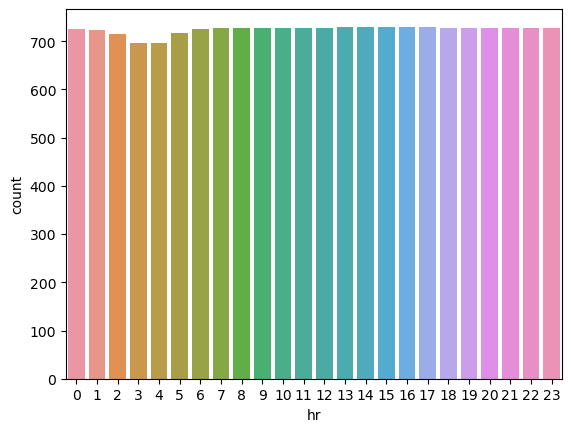

In [290]:
sns.countplot(merged_dataset, x="hr")

merged_dataset['hr'].value_counts()

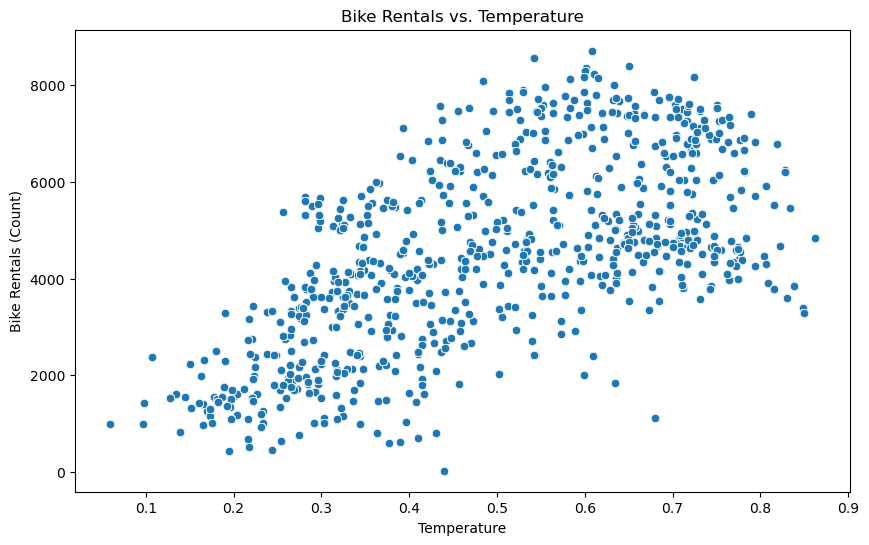

In [292]:
#Scatter Plots: Ideal for continuous variables. 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_dataset, x='temp', y='cnt')
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals (Count)')
plt.show()


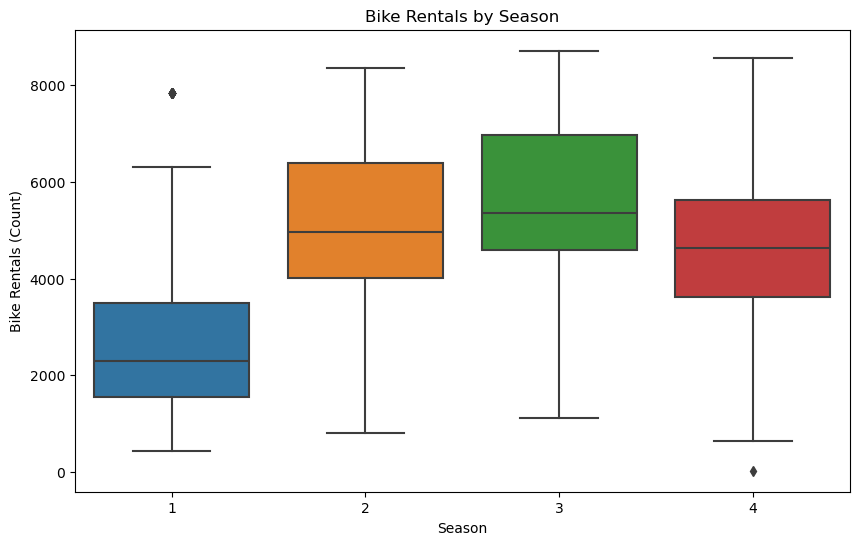

In [293]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_dataset, x='season', y='cnt')
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Bike Rentals (Count)')
plt.show()

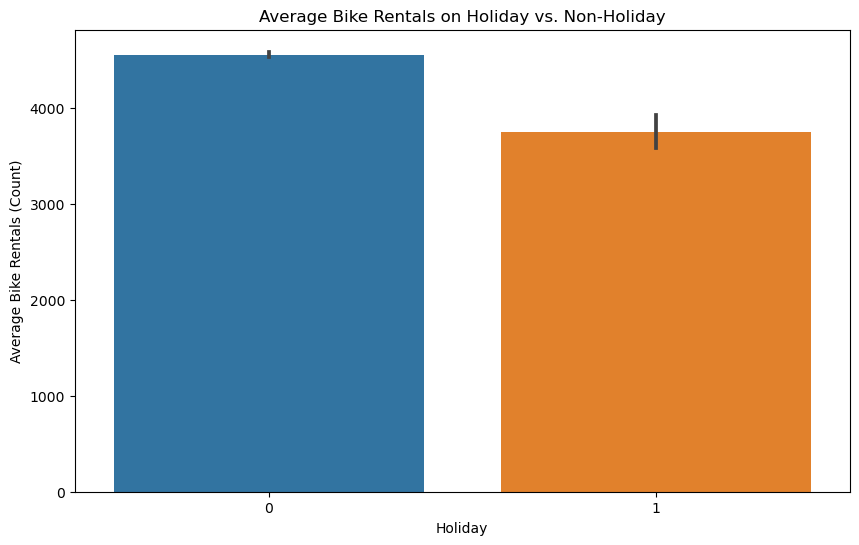

In [294]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_dataset, x='holiday', y='cnt')
plt.title('Average Bike Rentals on Holiday vs. Non-Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Bike Rentals (Count)')
plt.show()

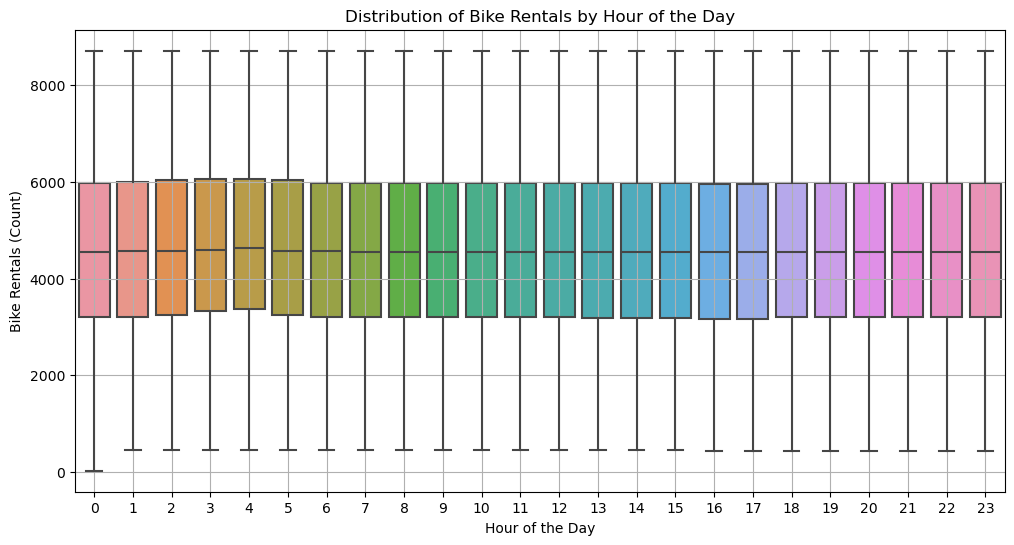

In [295]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_dataset, x='hr', y='cnt')
plt.title('Distribution of Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Rentals (Count)')
plt.xticks(range(0, 24))  # Show all hours
plt.grid()
plt.show()


C:\Users\sandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


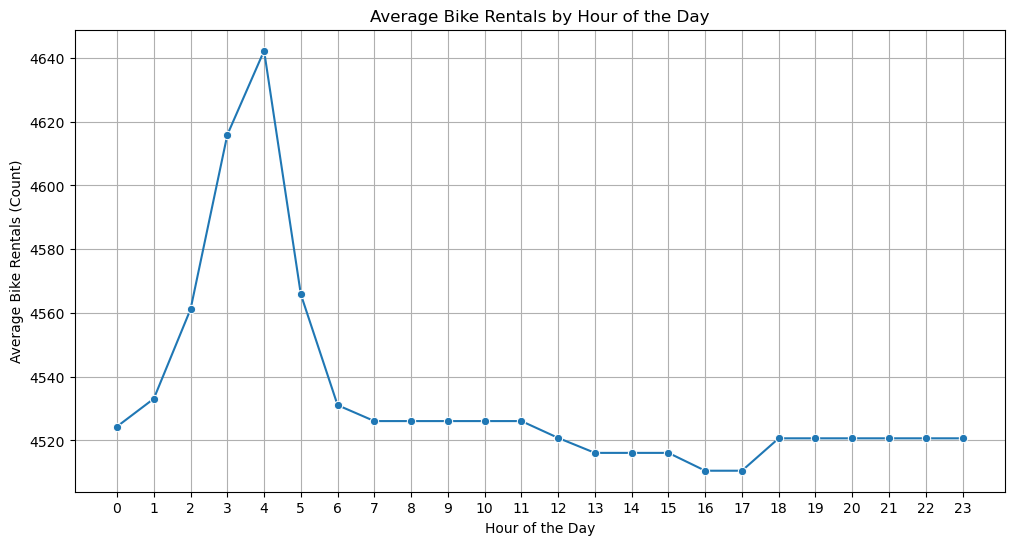

In [296]:
# Aggregate data by hour---line plot 
hourly_rentals = merged_dataset.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals (Count)')
plt.xticks(range(0, 24))  # Show all hours
plt.grid()
plt.show()

In [297]:
# Correlation between cnt and hr
correlation = merged_dataset[['cnt', 'hr']].corr().iloc[0, 1]
print(f'Correlation between bike rentals and hour of the day: {correlation:.2f}')

Correlation between bike rentals and hour of the day: -0.01


# Since I have analyze that, in Day Dataset: Focus on seasonality (season and month-wise trends), which factors drive rentals at a macro level (season, month).
# whereas in Hour Dataset: Focus on finer granularity (hourly trends), weather variables, and how they affect rentals on a micro level.
# So, My approach would be to combine the insights from both datasets for a holistic understanding. For example:

# Peak seasons identified from the day dataset can be cross-referenced with hourly data to determine ,if rentals spike at particular times during those peak months.
# Weather conditions could be analyzed in relation to both daily and hourly rentals. For instance, how do temperature and humidity vary not only within a day but across different months or seasons?

# Step 6: Identify Peak Months and Hours

In [299]:
# Group data by season and month to find average rentals
season_month_rentals = day_dataset.groupby(['season', 'mnth'])['cnt'].mean().reset_index()

# Sort by highest average rentals
peak_season = season_month_rentals.sort_values('cnt', ascending=False)
peak_season


,season,mnth,cnt
12,4,9,6024.500000
7,2,6,5773.850000
8,3,6,5769.400000
11,3,9,5672.704545
10,3,8,5664.419355
9,3,7,5563.677419
6,2,5,5349.774194
13,4,10,5199.225806
5,2,4,4484.900000
14,4,11,4247.183333


In [ ]:
# 1. Cross-Referencing Peak Seasons from the Day Dataset with Hourly Data.
###from the day dataset, group the data by season and month, and calculate the average bike rentals (cnt) for each month or season. 
###This will help identify which months/seasons have the highest rentals.

In [ ]:
###Identify Peak Hours in the Hour Dataset:

##From the hour dataset,
#Group by hr and check the average rentals (cnt) for each hour to find which hours of the day have the highest rentals.



In [310]:
# Group by hour to check average rentals
hour_rentals = hour_dataset.groupby('hr')['cnt'].mean().reset_index()

# Sort by highest average rentals
peak_hours = hour_rentals.sort_values('cnt', ascending=False)
print(peak_hours)


    hr         cnt
17  17  461.452055
18  18  425.510989
8    8  359.011004
16  16  311.983562
19  19  311.523352
13  13  253.661180
12  12  253.315934
15  15  251.233196
14  14  240.949246
20  20  226.030220
9    9  219.309491
7    7  212.064649
11  11  208.143054
10  10  173.668501
21  21  172.314560
22  22  131.335165
23  23   87.831044
6    6   76.044138
0    0   53.898072
1    1   33.375691
2    2   22.869930
5    5   19.889819
3    3   11.727403
4    4    6.352941


In [301]:
##Cross-Reference Peak Seasons and Hours:

##Now, combine the insights from both datasets:

##Filter the hour dataset to only include data from the peak months identified in the day dataset.

##Check how bike rentals vary across hours within these peak months.


C:\Users\sandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


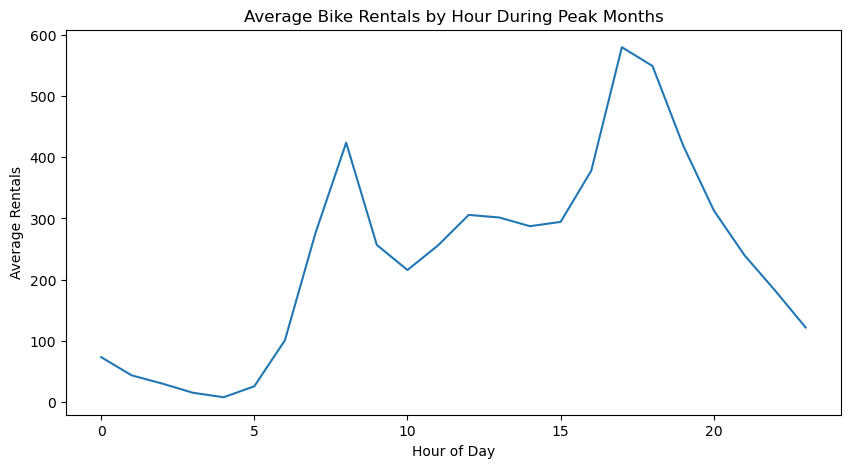

In [315]:
# Filter hour data for peak months
peak_months = [6, 7, 8, 9]
peak_hours_data = hour_dataset[hour_dataset['mnth'].isin(peak_months)]

# Group by hour and calculate average rentals
hourly_rentals_in_peak_months = peak_hours_data.groupby('hr')['cnt'].mean().reset_index()
hourly_rentals_in_peak_months
#Plot the average rentals per hour for peak months
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_rentals_in_peak_months, x='hr', y='cnt')
plt.title('Average Bike Rentals by Hour During Peak Months')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.show()



In [306]:
##Analyze Weather’s Impact Across Day and Hourly Rentals:
#For a deeper insight into how weather conditions (temperature, humidity) affect bike rentals:
#Daily Level: Check how weather impacts rentals overall for each day. I can correlate temp, hum, and windspeed with cnt for the ,
#daily dataset.
#Hourly Level: Dive deeper into the hour dataset and see if weather conditions (temperature, humidity) have a more granular impact,
#on rentals at different times of the day. 
#For instance, are afternoon rentals more sensitive to higher temperatures

# Step 7: Weather Analysis

Day Dataset Weather Correlation:
                 cnt      temp       hum  windspeed
cnt        1.000000  0.627494 -0.100659  -0.234545
temp       0.627494  1.000000  0.126963  -0.157944
hum       -0.100659  0.126963  1.000000  -0.248489
windspeed -0.234545 -0.157944 -0.248489   1.000000

Hour Dataset Weather Correlation:
                 cnt      temp       hum  windspeed
cnt        1.000000  0.404772 -0.322911   0.093234
temp       0.404772  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.069881  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.290105   1.000000


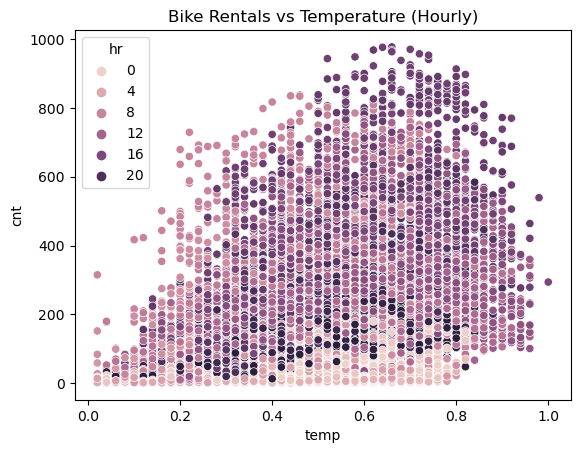

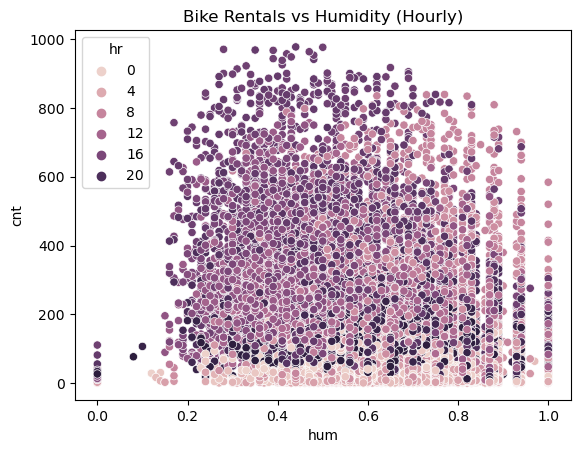

In [307]:
# Correlation of weather variables with rentals
day_weather_corr = day_dataset[['cnt', 'temp', 'hum', 'windspeed']].corr()
hour_weather_corr = hour_dataset[['cnt', 'temp', 'hum', 'windspeed']].corr()

print("Day Dataset Weather Correlation:\n", day_weather_corr)
print("\nHour Dataset Weather Correlation:\n", hour_weather_corr)

# Visualize temperature vs rentals for the hour dataset
sns.scatterplot(data=hour_dataset, x='temp', y='cnt', hue='hr')
plt.title('Bike Rentals vs Temperature (Hourly)')
plt.show()

# Visualize humidity vs rentals for the hour dataset
sns.scatterplot(data=hour_dataset, x='hum', y='cnt', hue='hr')
plt.title('Bike Rentals vs Humidity (Hourly)')
plt.show()


In [308]:
##Seasonal and Hourly Interactions:
#Explore how seasonality and weather conditions interact. For instance, are bike rentals more sensitive to humidity during hot months
#(July, August)? Does the effect of temperature on rentals differ between summer and fall?
#Group the hourly data by both season and hour to get a detailed breakdown of how bike rentals vary by hour within each season.

# Step 8: Seasonal and Monthly Analysis

C:\Users\sandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


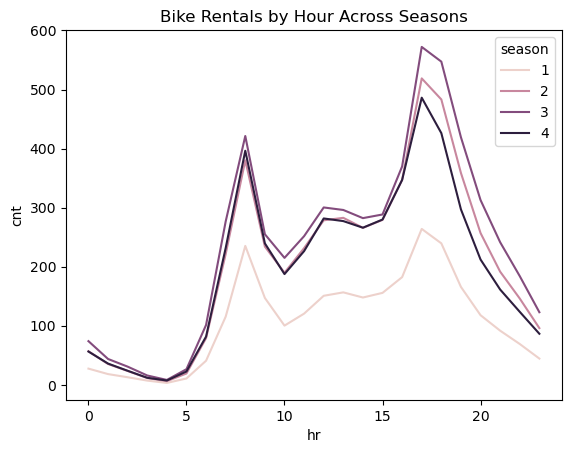

In [309]:
# Group hourly data by season and hour to check for seasonal hourly trends
hourly_season_trends = hour_dataset.groupby(['season', 'hr']).agg({'cnt': 'mean', 'temp': 'mean', 'hum': 'mean'}).reset_index()

# Plot bike rentals by season and hour
sns.lineplot(data=hourly_season_trends, x='hr', y='cnt', hue='season')
plt.title('Bike Rentals by Hour Across Seasons')
plt.show()


# Step 9: Conclusions


- 1)Based on the analyses performed, summarize the findings and insights regarding bike rental demand. 
- 2)Discuss the factors that have a significant impact on rentals, including time of day, weather conditions, and seasonal trends.

# Key Insights:
- Peak bike rentals occur during specific hours (e.g., noon to 4 PM and evening 5 to 9 PM).
- Weather conditions, especially temperature and humidity, significantly affect bike rentals.
- Seasonal trends indicate certain months have higher rental demand.

# Next Steps
- Based on the insights gained from this analysis, future work could include:

- Developing predictive models for bike rental demand.
- Exploring additional features such as holidays and special events.
- Implementing a recommendation system for bike rental services based on user behavior.